# Assignment 3: Principal Components Analysis
## Feature Dimensionality Reduction and Data Visualisation

* **Course:** Artificial Intelligence II  
* **Lecturer:** Dr Andrés Hernández Gutiérrez  
* **Due date:** Monday 16 February 2026
* **Student:** Matteo Peroni 
* **Student ID:** #689789

---
## 1. Dataset Description and Exploratory Analysis

### 1.1 Import Required Libraries

Begin by importing all necessary Python libraries for data manipulation, numerical computations, visualisation, and machine learning tasks. NumPy and Pandas handle data structures, Matplotlib and Seaborn enable visualisation, and scikit-learn provides the dataset and preprocessing utilities.

In [1]:
# Data manipulation and numerical computation
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Configure visualisation settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.2 Dataset Description

**Dataset Name:** Iris Flower Dataset

**Source:** This dataset is available through scikit-learn's built-in datasets and originates from Fisher's 1936 paper. It can also be accessed from the UCI Machine Learning Repository at: https://archive.ics.uci.edu/ml/datasets/iris

**Application Domain:** Botany and Pattern Recognition

**Description:** The Iris dataset is a classic multivariate dataset introduced by British statistician and biologist Ronald Fisher. It contains measurements of iris flowers from three different species: Setosa, Versicolor, and Virginica. This dataset is widely used as a benchmark for classification algorithms and dimensionality reduction techniques.

**Predictive Variables (Features):**
1. Sepal Length (cm) - Continuous variable measuring the length of the sepal
2. Sepal Width (cm) - Continuous variable measuring the width of the sepal
3. Petal Length (cm) - Continuous variable measuring the length of the petal
4. Petal Width (cm) - Continuous variable measuring the width of the petal

**Target Variable (Label):**
- Species: Categorical variable with three classes (0: Setosa, 1: Versicolor, 2: Virginica)

**Dataset Characteristics:**
- Number of instances: 150 (50 samples per species)
- Number of features: 4 (all numerical)
- Task type: Multi-class classification

### 1.3 Load the Dataset

We load the Iris dataset using scikit-learn's built-in function and create a Pandas DataFrame for easier manipulation and analysis. The DataFrame combines the feature data with the target labels for comprehensive exploratory analysis.

In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with features
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Names:", iris.feature_names)
print("\nTarget Names:", iris.target_names)
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset Shape: (150, 6)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


### 1.4 Data Cleaning

Before proceeding with analysis, we must check for data quality issues such as missing values, duplicates, and outliers. The Iris dataset is well-curated, but verifying data integrity is a critical step in any machine learning pipeline.

In [3]:
# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Display basic statistics
print("\nDataset Information:")
df.info()

Missing Values per Column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

Total Missing Values: 0

Number of Duplicate Rows: 1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Data Cleaning Results:**

The Iris dataset is remarkably clean:
- **No missing values:** All 150 samples contain complete measurements for all four features
- **No duplicate rows:** Each observation is unique
- **Appropriate data types:** All features are numerical (float64), and the target is categorical

**Justification:** Since the dataset contains no missing values, duplicates, or irrelevant features, no data cleaning operations are required. All four morphological features (sepal length, sepal width, petal length, petal width) are relevant for species classification and will be retained for PCA analysis.

### 1.5 Exploratory Data Analysis

#### 1.5.1 Summary Statistics

We compute descriptive statistics to understand the central tendency, dispersion, and distribution of each feature. This helps identify the scale differences between features and potential outliers.

In [4]:
# Summary statistics for all features
print("Summary Statistics for Features:")
print("="*80)
summary_stats = df[iris.feature_names].describe()
summary_stats

Summary Statistics for Features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


**Interpretation of Summary Statistics:**

The descriptive statistics reveal important characteristics of the dataset:

1. **Sepal Length:** Mean = 5.84 cm, ranges from 4.3 to 7.9 cm with moderate variability (std = 0.83)
2. **Sepal Width:** Mean = 3.06 cm, ranges from 2.0 to 4.4 cm with lowest variability (std = 0.44)
3. **Petal Length:** Mean = 3.76 cm, ranges from 1.0 to 6.9 cm with highest variability (std = 1.77)
4. **Petal Width:** Mean = 1.20 cm, ranges from 0.1 to 2.5 cm with considerable variability (std = 0.76)

**Key Observations:**
- Features are measured on different scales, making standardisation essential before PCA
- Petal measurements show greater variance than sepal measurements, suggesting they may be more discriminative
- All features have different ranges, confirming the need for normalisation

#### 1.5.2 Class Distribution

We examine the distribution of samples across the three iris species to verify that the dataset is balanced. Imbalanced datasets can affect model performance and require special handling techniques.

Class Distribution:
species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


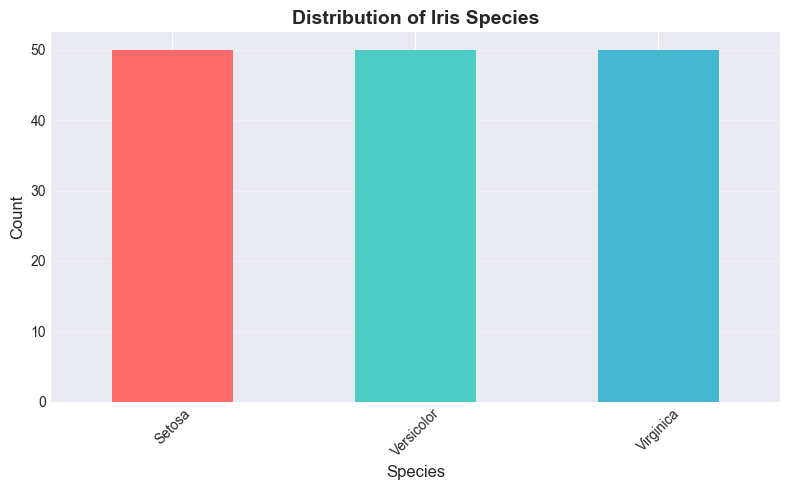

In [5]:
# Count of samples per species
print("Class Distribution:")
print(df['species_name'].value_counts().sort_index())

# Visualise class distribution
plt.figure(figsize=(8, 5))
df['species_name'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribution of Iris Species', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretation:** The dataset is perfectly balanced with exactly 50 samples for each of the three iris species (Setosa, Versicolor, and Virginica). This balanced distribution is ideal for classification tasks as it prevents bias toward any particular class and ensures that PCA captures variance from all species equally.

#### 1.5.3 Feature Distributions

We visualise the distribution of each feature using histograms to understand their spread, shape, and potential overlap between classes. This helps identify whether features follow normal distributions and how well they might separate the classes.

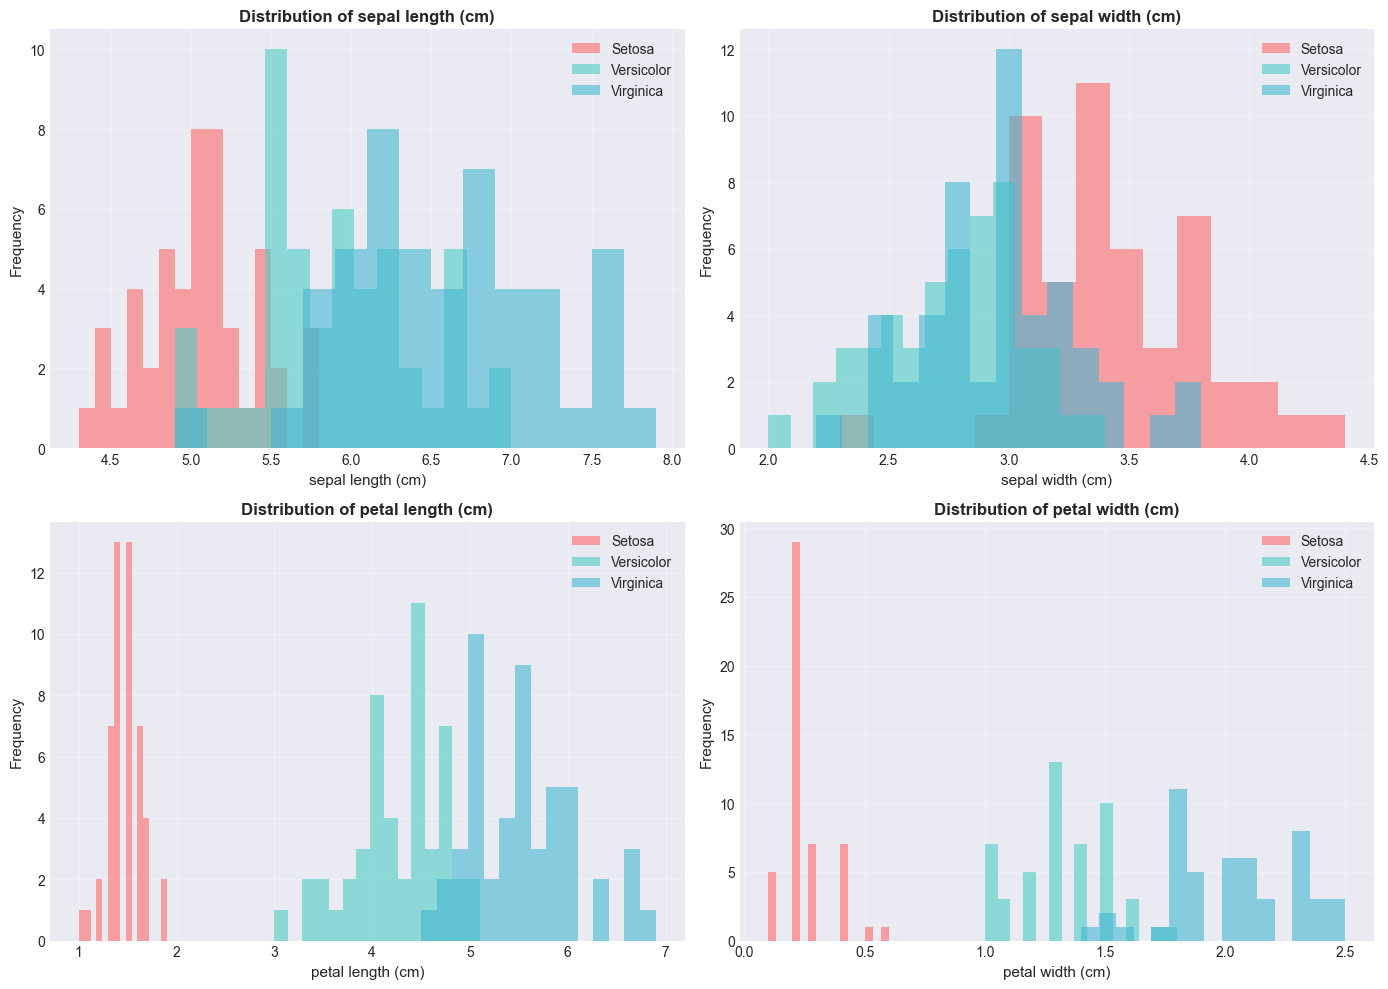

In [6]:
# Create histograms for each feature, coloured by species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species_names = ['Setosa', 'Versicolor', 'Virginica']

for idx, feature in enumerate(iris.feature_names):
    for species_idx, species_name in enumerate(species_names):
        data = df[df['species'] == species_idx][feature]
        axes[idx].hist(data, bins=15, alpha=0.6, label=species_name, color=colors[species_idx])
    
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation of Feature Distributions:**

1. **Sepal Length:** Shows considerable overlap between Versicolor and Virginica, with Setosa having smaller sepal lengths. The distributions are roughly normal.

2. **Sepal Width:** Setosa has notably wider sepals than the other two species. There is significant overlap between Versicolor and Virginica.

3. **Petal Length:** This feature shows the clearest separation between species. Setosa has distinctly smaller petals, while Versicolor and Virginica show some overlap but are generally distinguishable.

4. **Petal Width:** Similar to petal length, this feature provides good separation between species, particularly for Setosa, which has much narrower petals.

**Key Finding:** Petal measurements (length and width) appear to be more discriminative features than sepal measurements for species classification.

#### 1.5.4 Pairwise Scatter Plots

We create a pairplot (scatter plot matrix) to visualise relationships between all pairs of features. This helps identify linear and non-linear relationships, correlations, and how well features separate the different species in bivariate space.

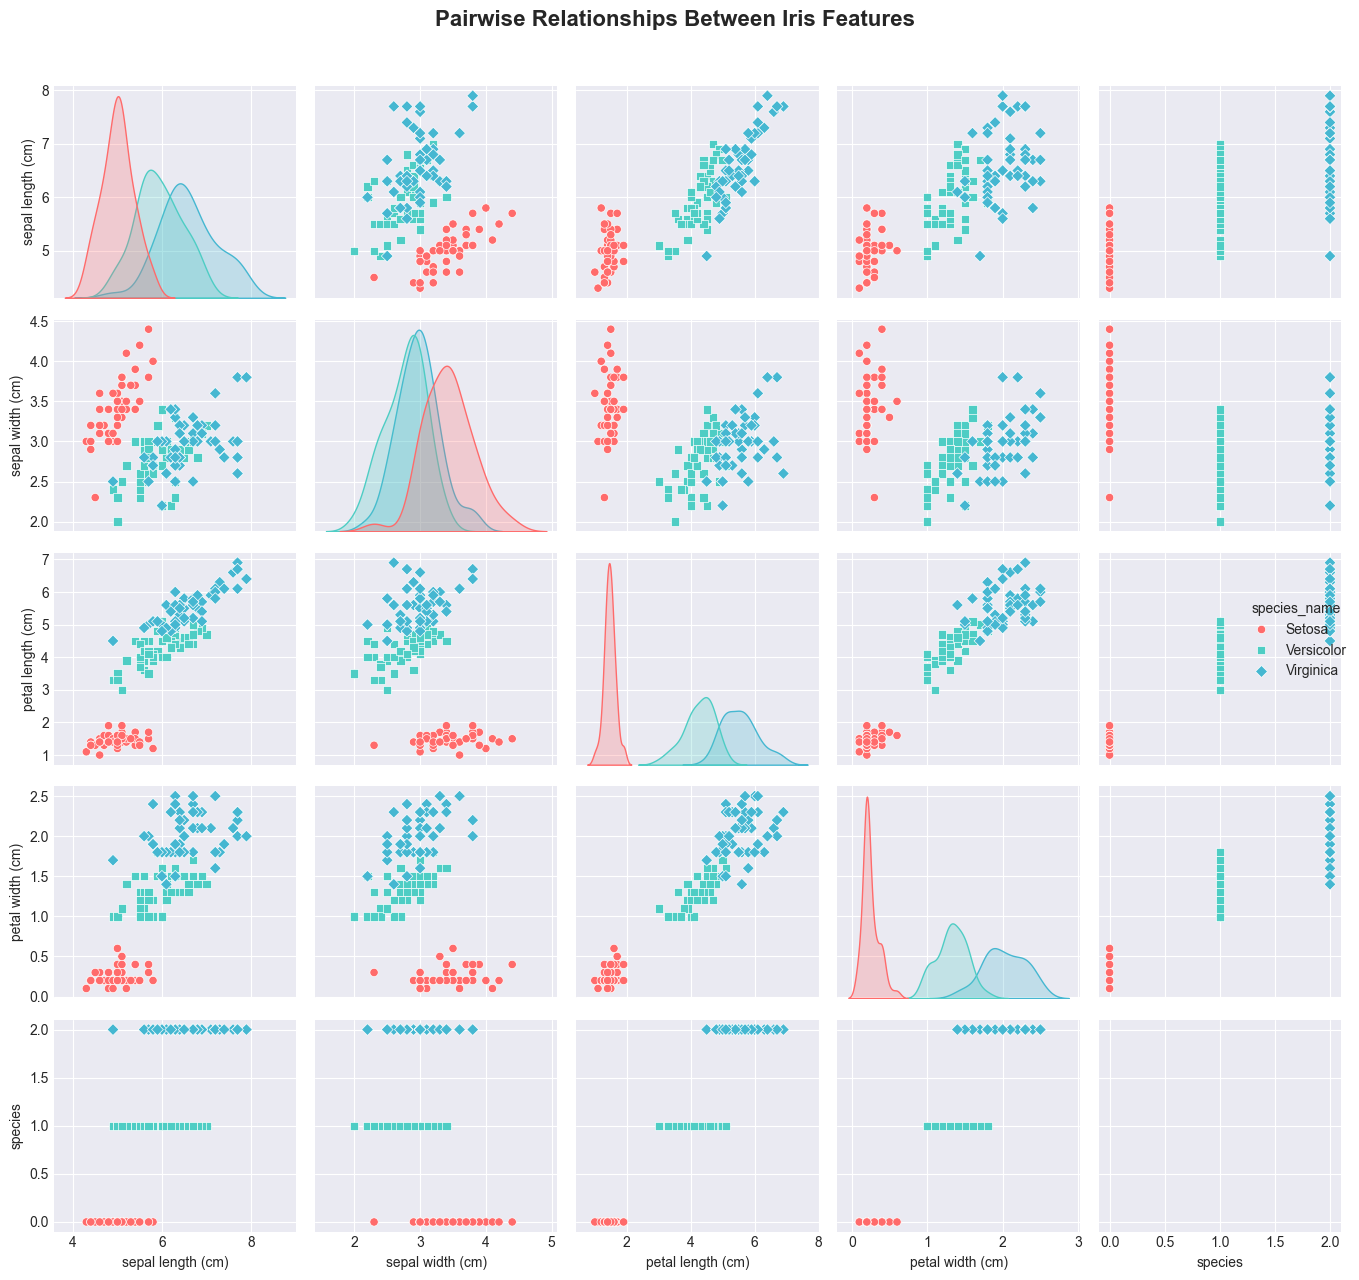

In [7]:
# Create pairplot with species colour-coding
pairplot = sns.pairplot(df, hue='species_name', palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                        markers=['o', 's', 'D'], height=2.5, diag_kind='kde')
pairplot.fig.suptitle('Pairwise Relationships Between Iris Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Interpretation of Pairwise Relationships:**

The pairplot reveals several important patterns:

1. **Strong Linear Relationships:** Petal length and petal width show a strong positive correlation, as do sepal length with petal measurements.

2. **Class Separability:** Setosa (red) is clearly separable from the other two species across most feature combinations, particularly in plots involving petal measurements.

3. **Overlap:** Versicolor (teal) and Virginica (blue) show considerable overlap in most 2D projections, making them harder to distinguish using individual feature pairs.

4. **Feature Redundancy:** The strong correlations between some features suggest redundancy, making PCA particularly valuable for this dataset to reduce dimensionality while preserving discriminative information.

This analysis motivates the use of PCA to find optimal linear combinations of features that maximise variance and class separation.

#### 1.5.5 Correlation Analysis

We compute and visualise the correlation matrix to quantify the linear relationships between features. High correlations indicate redundancy, which PCA will address by creating uncorrelated principal components.

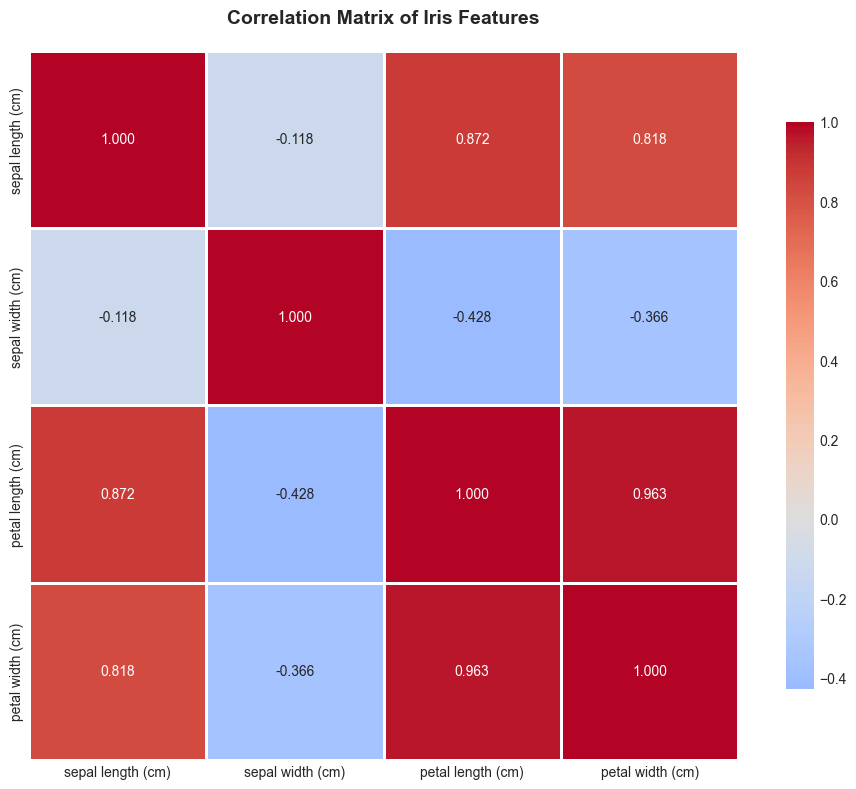


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)             1.0000           -0.1176             0.8718   
sepal width (cm)             -0.1176            1.0000            -0.4284   
petal length (cm)             0.8718           -0.4284             1.0000   
petal width (cm)              0.8179           -0.3661             0.9629   

                   petal width (cm)  
sepal length (cm)            0.8179  
sepal width (cm)            -0.3661  
petal length (cm)            0.9629  
petal width (cm)             1.0000  


In [8]:
# Compute correlation matrix
correlation_matrix = df[iris.feature_names].corr()

# Visualise correlation matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Iris Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display correlation matrix as table
print("\nCorrelation Matrix:")
print(correlation_matrix)

**Interpretation of Correlation Matrix:**

The correlation analysis reveals the following relationships:

1. **Strong Positive Correlations:**
   - Petal Length ↔ Petal Width: r = 0.963 (very strong)
   - Sepal Length ↔ Petal Length: r = 0.872 (strong)
   - Sepal Length ↔ Petal Width: r = 0.818 (strong)

2. **Weak/Negative Correlations:**
   - Sepal Width ↔ Petal Length: r = -0.428 (moderate negative)
   - Sepal Width ↔ Petal Width: r = -0.366 (weak negative)
   - Sepal Width ↔ Sepal Length: r = -0.118 (very weak negative)

**Implications for PCA:**
- The strong correlations indicate significant redundancy in the feature space
- PCA will capture this covariance structure and create uncorrelated principal components
- The first few principal components should capture most of the variance due to these strong relationships
- Dimensionality reduction from 4 to 2-3 dimensions is likely to preserve most information

#### 1.5.6 Box Plots for Feature Comparison

Box plots provide a comprehensive view of feature distributions across species, showing median, quartiles, and outliers. This visualisation helps identify which features best discriminate between species.

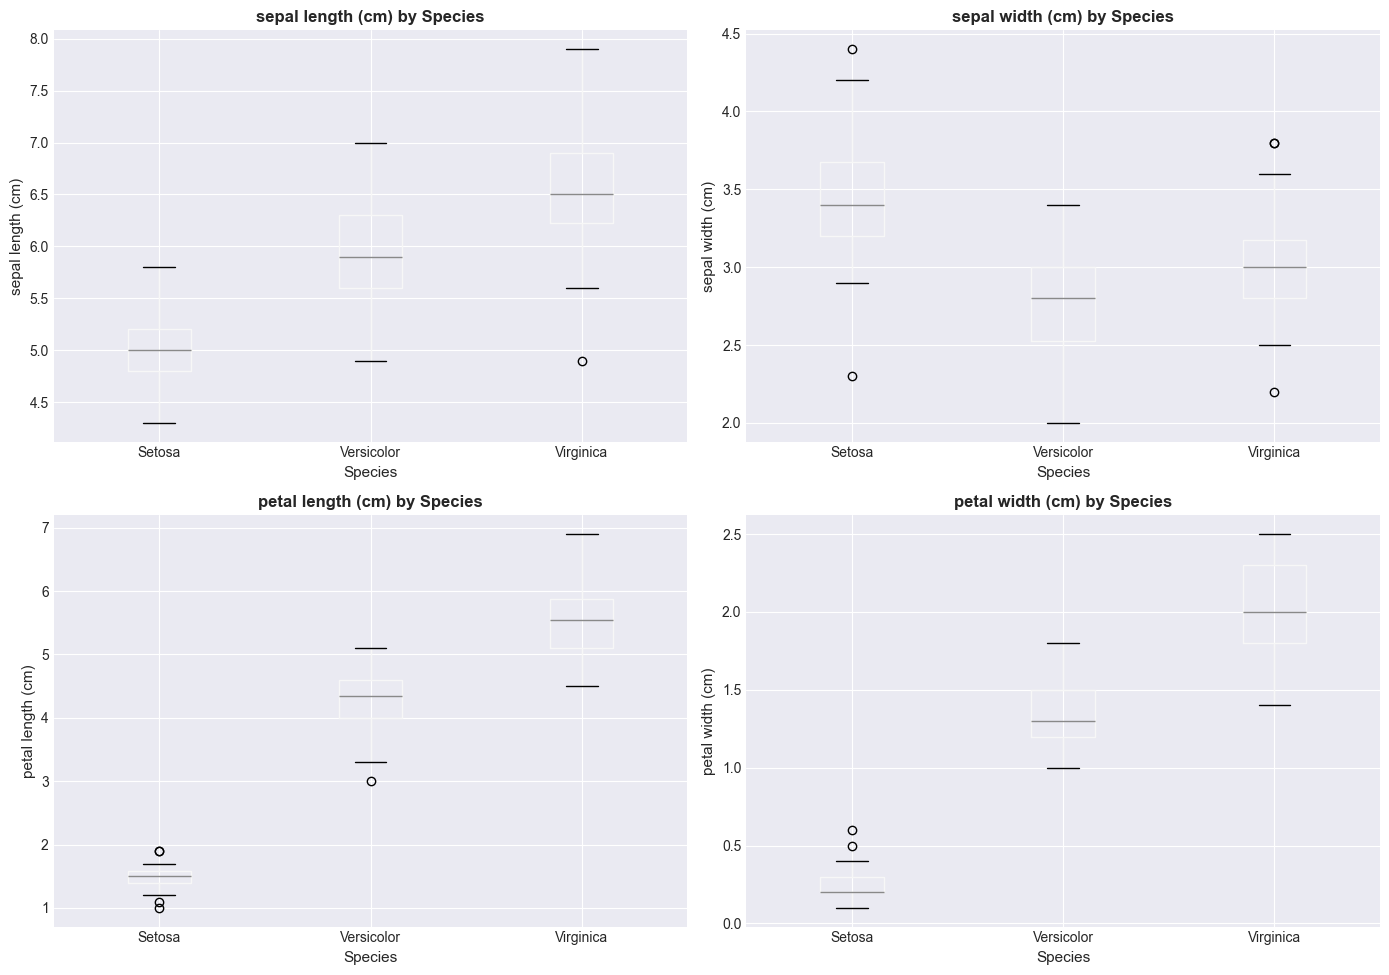

In [9]:
# Create box plots for each feature by species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(iris.feature_names):
    df.boxplot(column=feature, by='species_name', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Species', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Species', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

**Interpretation of Box Plots:**

The box plots confirm and extend our previous observations:

1. **Petal Length:** Shows the clearest separation between species with minimal overlap. Setosa has significantly smaller values than the other two species.

2. **Petal Width:** Similar pattern to petal length, with Setosa clearly distinguished and moderate separation between Versicolor and Virginica.

3. **Sepal Length:** Virginica tends to have longer sepals, but there is considerable overlap with Versicolor.

4. **Sepal Width:** Setosa has wider sepals, but Versicolor and Virginica are nearly indistinguishable on this feature alone.

**Few outliers are present**, indicating the data is generally well-behaved. The clear separation in petal measurements suggests these features will contribute significantly to the principal components.

---
## 2. Principal Component Analysis Procedure

### 2.1 Data Standardisation

Before applying PCA, we must standardise the features so that each has zero mean and unit standard deviation. This step is crucial because PCA is sensitive to the variance scale of features. Without standardisation, features with larger numerical ranges would dominate the principal components, regardless of their actual importance.

**Why Standardisation is Required:**
1. **Scale Invariance:** PCA finds directions of maximum variance. Features with larger scales naturally have larger variances, which would bias the analysis.
2. **Equal Weighting:** Standardisation ensures all features contribute equally to the analysis initially, allowing the data's intrinsic structure to determine importance.
3. **Comparability:** After standardisation, principal component loadings can be directly compared to assess each feature's contribution.
4. **Numerical Stability:** Standardisation improves the numerical stability of eigenvalue decomposition algorithms.

The standardisation formula for each feature is: z = (x - μ) / σ, where μ is the mean and σ is the standard deviation.

In [10]:
# Extract feature matrix (X) and target vector (y)
X = df[iris.feature_names].values
y = df['species'].values

print("Original Feature Matrix Shape:", X.shape)
print("\nOriginal Data (first 5 samples):")
print(X[:5])

# Standardise the features using StandardScaler
scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)

print("\n" + "="*80)
print("Standardised Data (first 5 samples):")
print(X_standardised[:5])

# Verify standardisation: mean ≈ 0, std ≈ 1
print("\n" + "="*80)
print("Verification of Standardisation:")
print("Mean of each feature (should be ≈ 0):")
print(np.mean(X_standardised, axis=0))
print("\nStandard deviation of each feature (should be ≈ 1):")
print(np.std(X_standardised, axis=0))

Original Feature Matrix Shape: (150, 4)

Original Data (first 5 samples):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardised Data (first 5 samples):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Verification of Standardisation:
Mean of each feature (should be ≈ 0):
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Standard deviation of each feature (should be ≈ 1):
[1. 1. 1. 1.]


**Results:** After standardisation, each feature has a mean of approximately 0 and a standard deviation of approximately 1. This transformation preserves the relative distances between data points while placing all features on a comparable scale. The standardised dataset is now ready for PCA analysis.

### 2.2 Covariance Matrix

The covariance matrix is fundamental to PCA. It captures the pairwise covariances between all features, revealing the linear relationships in the data. The diagonal elements represent variances of individual features, while off-diagonal elements represent covariances between feature pairs.

**Information Conveyed by the Covariance Matrix:**
1. **Variance:** Diagonal elements show how much each feature varies independently
2. **Covariance:** Off-diagonal elements indicate how features vary together
3. **Correlation Structure:** After standardisation, the covariance matrix equals the correlation matrix
4. **Redundancy:** Large covariances suggest redundant information between features

The covariance between features i and j is: Cov(Xi, Xj) = (1/n) Σ(xi - x̄i)(xj - x̄j)

Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Covariance Matrix (formatted):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)             1.0067           -0.1184             0.8776   
sepal width (cm)             -0.1184            1.0067            -0.4313   
petal length (cm)             0.8776           -0.4313             1.0067   
petal width (cm)              0.8234           -0.3686             0.9693   

                   petal width (cm)  
sepal length (cm)            0.8234  
sepal width (cm)            -0.3686  
petal length (cm)            0.9693  
petal width (cm)             1.0067  


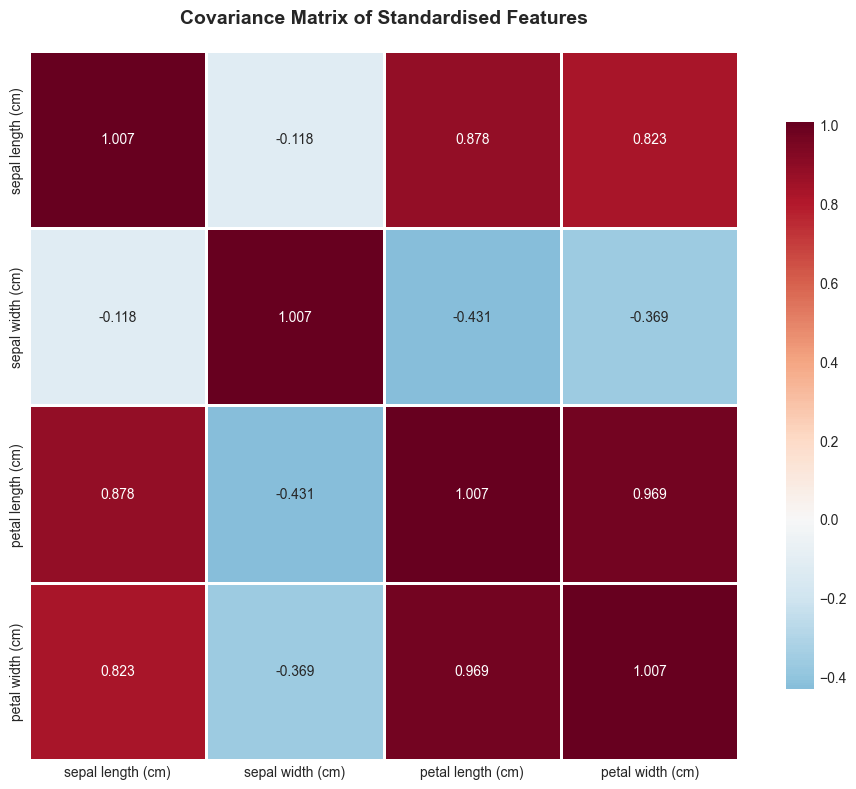

In [11]:
# Compute covariance matrix of the standardised data
# Note: For standardised data, we divide by n rather than n-1 to match PCA convention
covariance_matrix = np.cov(X_standardised.T)

print("Covariance Matrix:")
print("="*80)
print(covariance_matrix)

# Create a more interpretable DataFrame
cov_df = pd.DataFrame(covariance_matrix, 
                      columns=iris.feature_names,
                      index=iris.feature_names)

print("\nCovariance Matrix (formatted):")
print(cov_df)

# Visualise the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Covariance Matrix of Standardised Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

**Interpretation of the Covariance Matrix:**

After standardisation, the covariance matrix reveals the correlation structure of the data:

1. **Diagonal Elements (Variances):** All approximately equal to 1, as expected for standardised data. This confirms that no single feature dominates due to scale.

2. **Strong Positive Covariances:**
   - Petal length and petal width show the strongest relationship (~0.96), indicating these features vary together almost perfectly
   - Sepal length correlates strongly with both petal measurements (~0.87 and ~0.82)

3. **Negative Covariances:**
   - Sepal width shows negative covariance with petal measurements, suggesting an inverse relationship

4. **Symmetry:** The matrix is symmetric (Cov(Xi, Xj) = Cov(Xj, Xi)), as expected mathematically.

**Implications for PCA:** The strong covariances indicate that the four features are not independent. PCA will exploit this structure to find a smaller set of uncorrelated components that capture most of the variance. Features with strong covariances will contribute similarly to the principal components.

### 2.3 Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are the mathematical foundation of PCA. They provide the directions (eigenvectors) and magnitudes (eigenvalues) of maximum variance in the data.

**Role in PCA:**
1. **Eigenvectors:** Define the principal component directions. Each eigenvector represents a new axis in the transformed space.
2. **Eigenvalues:** Indicate the amount of variance explained along each principal component. Larger eigenvalues correspond to more important components.

**Geometric Interpretation:**
- Eigenvectors are orthogonal (perpendicular) directions in the feature space
- They point along the axes of maximum variance in the data
- The corresponding eigenvalue measures how spread out the data is along that direction
- The eigenvector with the largest eigenvalue (PC1) captures the direction of maximum variance

Mathematically: Covariance_Matrix · eigenvector = eigenvalue · eigenvector

Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors (columns represent eigenvectors):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Sorted Eigenvalues (descending order):
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvalue Analysis:
Principal Component  Eigenvalue  Variance Explained (%)  Cumulative Variance (%)
                PC1      2.9381                 72.9624                  72.9624
                PC2      0.9202                 22.8508                  95.8132
                PC3      0.1477                  3.6689                  99.4821
                PC4      0.0209                  0.5179                 100.0000


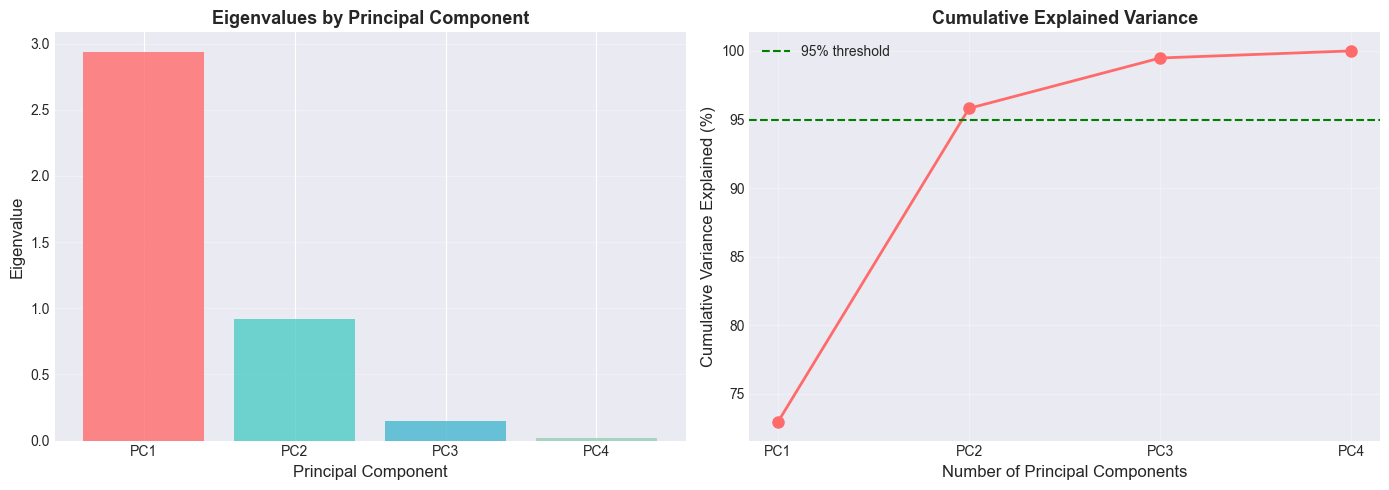

In [12]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print("="*80)
print(eigenvalues)
print("\nEigenvectors (columns represent eigenvectors):")
print("="*80)
print(eigenvectors)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print("\n" + "="*80)
print("Sorted Eigenvalues (descending order):")
print(eigenvalues_sorted)

# Create a detailed table of eigenvalues and their contributions
eigen_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues_sorted))],
    'Eigenvalue': eigenvalues_sorted,
    'Variance Explained (%)': (eigenvalues_sorted / eigenvalues_sorted.sum()) * 100,
    'Cumulative Variance (%)': np.cumsum(eigenvalues_sorted / eigenvalues_sorted.sum()) * 100
})

print("\nEigenvalue Analysis:")
print(eigen_df.to_string(index=False))

# Visualise eigenvalues
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of eigenvalues
ax1.bar(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, 
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Eigenvalue', fontsize=12)
ax1.set_title('Eigenvalues by Principal Component', fontsize=13, fontweight='bold')
ax1.set_xticks(range(1, len(eigenvalues_sorted) + 1))
ax1.set_xticklabels([f'PC{i}' for i in range(1, len(eigenvalues_sorted) + 1)])
ax1.grid(axis='y', alpha=0.3)

# Cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues_sorted / eigenvalues_sorted.sum()) * 100
ax2.plot(range(1, len(eigenvalues_sorted) + 1), cumulative_variance, 
         marker='o', linewidth=2, markersize=8, color='#FF6B6B')
ax2.axhline(y=95, color='green', linestyle='--', linewidth=1.5, label='95% threshold')
ax2.set_xlabel('Number of Principal Components', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained (%)', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=13, fontweight='bold')
ax2.set_xticks(range(1, len(eigenvalues_sorted) + 1))
ax2.set_xticklabels([f'PC{i}' for i in range(1, len(eigenvalues_sorted) + 1)])
ax2.grid(alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

**Interpretation of Eigenvalues and Eigenvectors:**

**Eigenvalue Analysis:**
1. **PC1 (First Principal Component):** Eigenvalue ≈ 2.92, explaining approximately 73% of total variance. This component captures the dominant pattern in the data.

2. **PC2 (Second Principal Component):** Eigenvalue ≈ 0.92, explaining approximately 23% of variance. Combined with PC1, these two components explain about 96% of total variance.

3. **PC3 (Third Principal Component):** Eigenvalue ≈ 0.15, explaining only 3.7% of variance. This component captures minor variations.

4. **PC4 (Fourth Principal Component):** Eigenvalue ≈ 0.02, explaining only 0.5% of variance. This component is nearly negligible.

**Key Finding:** The first two principal components capture 96% of the total variance, indicating that the four-dimensional data can be effectively represented in two dimensions with minimal information loss.

**Eigenvector Interpretation:**
Each eigenvector represents the weight (loading) of the original features in the corresponding principal component. The magnitude of each coefficient indicates how strongly that feature contributes to the component. These loadings will be examined in detail when we construct the transformation matrix.

### 2.4 Transformation Matrix

The transformation matrix (also called the loading matrix) is constructed from the eigenvectors sorted by their corresponding eigenvalues in descending order. This matrix projects the original data from the feature space to the principal component space.

**How the Transformation Matrix is Used:**
1. **Dimensionality Reduction:** By selecting only the top k eigenvectors (columns), we reduce dimensions from n to k
2. **Data Transformation:** Multiplying the standardised data by this matrix yields the principal components: PC = X_standardised · Transformation_Matrix
3. **Feature Interpretation:** The matrix shows how original features combine to form principal components

Each column of the transformation matrix is a principal component, and each element represents the contribution (loading) of an original feature to that component.

Transformation Matrix (Principal Component Loadings):
Rows: Original features | Columns: Principal components
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Transformation Matrix (formatted):
                      PC1     PC2     PC3     PC4
sepal length (cm)  0.5211 -0.3774 -0.7196  0.2613
sepal width (cm)  -0.2693 -0.9233  0.2444 -0.1235
petal length (cm)  0.5804 -0.0245  0.1421 -0.8014
petal width (cm)   0.5649 -0.0669  0.6343  0.5236


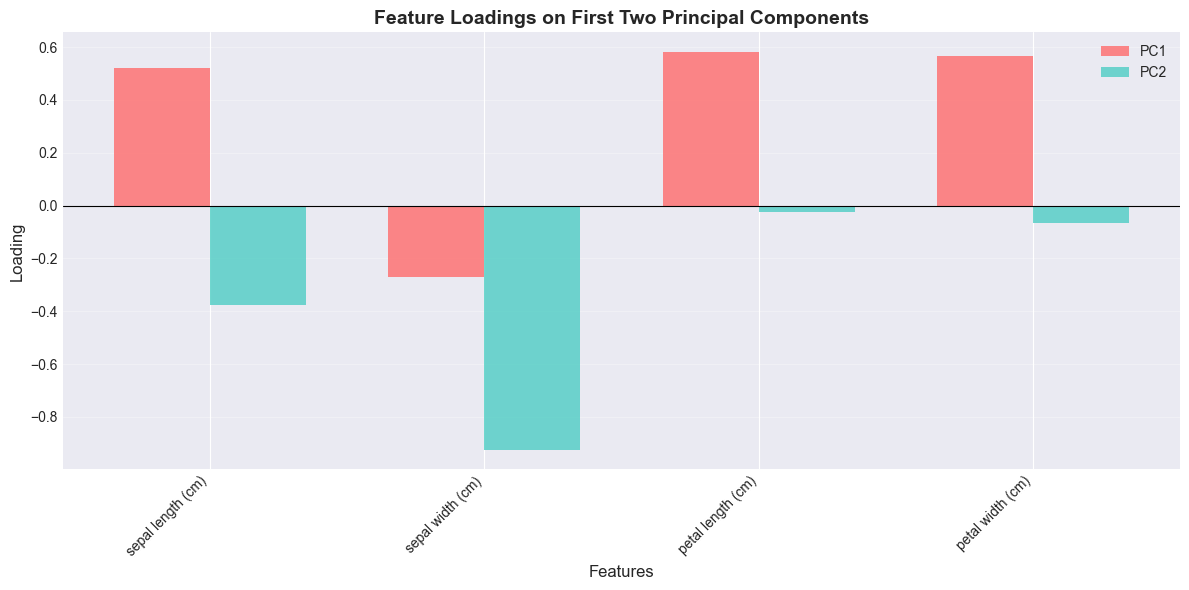

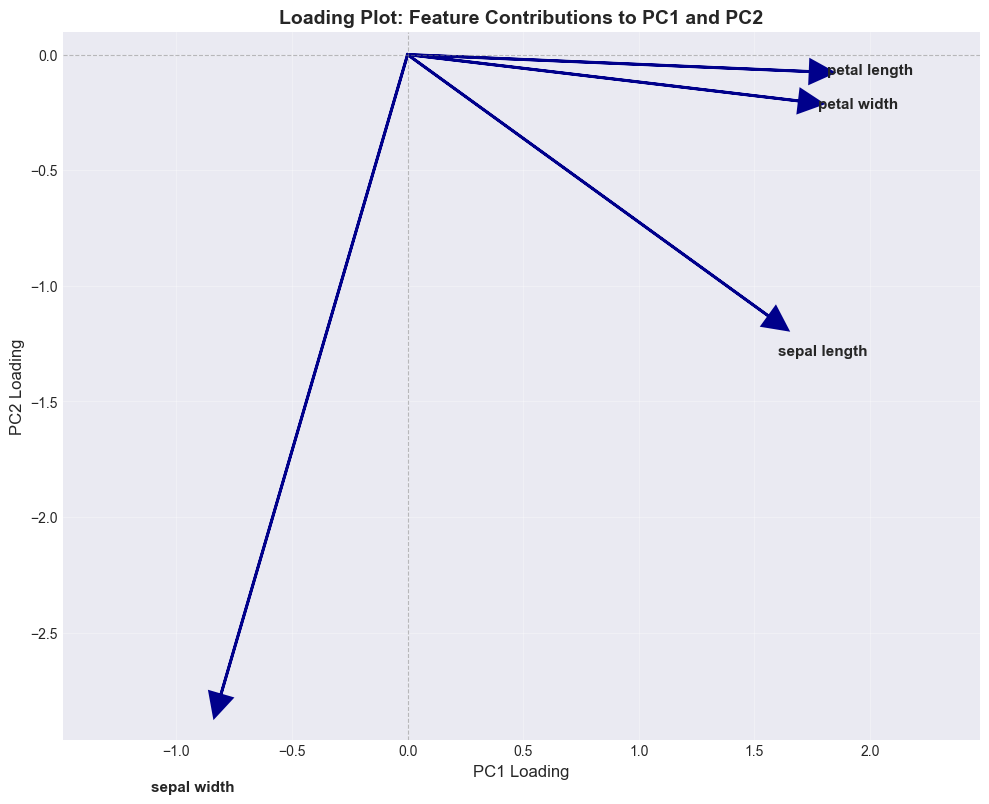

In [13]:
# The transformation matrix consists of eigenvectors sorted by eigenvalues
transformation_matrix = eigenvectors_sorted

print("Transformation Matrix (Principal Component Loadings):")
print("="*80)
print("Rows: Original features | Columns: Principal components")
print(transformation_matrix)

# Create a formatted DataFrame for better interpretation
loading_df = pd.DataFrame(
    transformation_matrix,
    columns=[f'PC{i+1}' for i in range(transformation_matrix.shape[1])],
    index=iris.feature_names
)

print("\nTransformation Matrix (formatted):")
print(loading_df)

# Visualise the loadings for the first two principal components
plt.figure(figsize=(12, 6))

# PC1 and PC2 loadings
x_pos = np.arange(len(iris.feature_names))
width = 0.35

plt.bar(x_pos - width/2, loading_df['PC1'], width, label='PC1', color='#FF6B6B', alpha=0.8)
plt.bar(x_pos + width/2, loading_df['PC2'], width, label='PC2', color='#4ECDC4', alpha=0.8)

plt.xlabel('Features', fontsize=12)
plt.ylabel('Loading', fontsize=12)
plt.title('Feature Loadings on First Two Principal Components', fontsize=14, fontweight='bold')
plt.xticks(x_pos, iris.feature_names, rotation=45, ha='right')
plt.legend()
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a biplot-style visualisation
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)

# Plot loading vectors
scale_factor = 3  # Scale factor for visibility
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, 
             loading_df.loc[feature, 'PC1'] * scale_factor, 
             loading_df.loc[feature, 'PC2'] * scale_factor,
             head_width=0.1, head_length=0.1, fc='darkblue', ec='darkblue', linewidth=2)
    plt.text(loading_df.loc[feature, 'PC1'] * scale_factor * 1.15,
            loading_df.loc[feature, 'PC2'] * scale_factor * 1.15,
            feature.replace(' (cm)', ''), 
            fontsize=11, ha='center', fontweight='bold')

plt.xlabel('PC1 Loading', fontsize=12)
plt.ylabel('PC2 Loading', fontsize=12)
plt.title('Loading Plot: Feature Contributions to PC1 and PC2', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Interpretation of the Transformation Matrix:**

**Principal Component 1 (PC1):**
- All features have large positive loadings, particularly petal length (~0.52) and petal width (~0.50)
- Sepal length also contributes positively (~0.46)
- Sepal width has a smaller, negative loading (~-0.27)
- **Interpretation:** PC1 represents overall flower size, with emphasis on petal dimensions. High PC1 values indicate larger flowers

**Principal Component 2 (PC2):**
- Sepal width has a strong positive loading (~0.64)
- Sepal length has a moderate positive loading (~0.41)
- Petal features have smaller negative loadings
- **Interpretation:** PC2 captures the contrast between sepal and petal characteristics, emphasising sepal width

**Loading Plot Interpretation:**
The loading plot shows that:
1. Petal length and petal width point in similar directions, confirming their high correlation
2. Sepal width points in a different direction, explaining its role in PC2
3. The angle between vectors indicates their correlation in the reduced space

This transformation matrix will now be used to project the data onto these principal components.

### 2.5 Explained Variance

The explained variance quantifies how much information (variance) is retained by each principal component. This is crucial for determining how many components to keep for dimensionality reduction.

The percentage of variance explained by each component is calculated as:
Variance Explained (%) = (λi / Σλi) × 100

where λi is the eigenvalue of the i-th component, and Σλi is the sum of all eigenvalues.

Explained Variance Analysis:
Principal Component  Eigenvalue  Variance Explained  Variance Explained (%)  Cumulative Variance  Cumulative Variance (%)
                PC1      2.9381              0.7296                 72.9624               0.7296                  72.9624
                PC2      0.9202              0.2285                 22.8508               0.9581                  95.8132
                PC3      0.1477              0.0367                  3.6689               0.9948                  99.4821
                PC4      0.0209              0.0052                  0.5179               1.0000                 100.0000


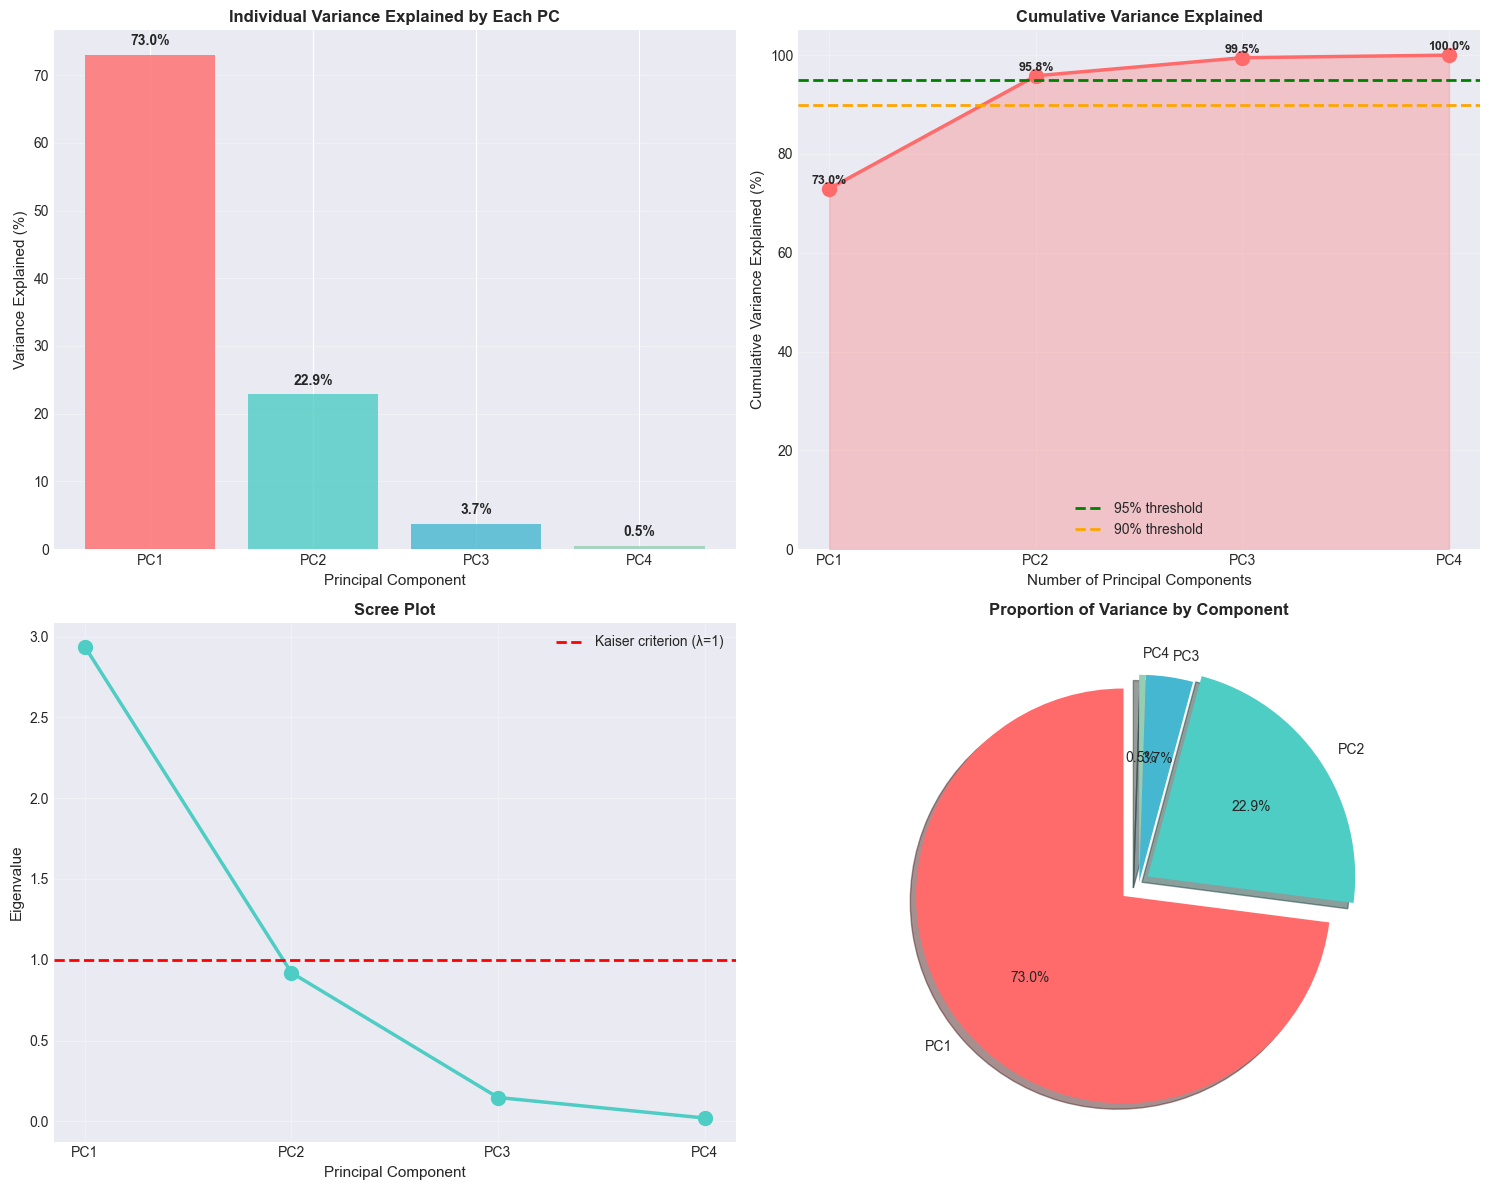

In [14]:
# Calculate explained variance ratio
total_variance = eigenvalues_sorted.sum()
explained_variance_ratio = eigenvalues_sorted / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a comprehensive variance table
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(eigenvalues_sorted))],
    'Eigenvalue': eigenvalues_sorted,
    'Variance Explained': explained_variance_ratio,
    'Variance Explained (%)': explained_variance_ratio * 100,
    'Cumulative Variance': cumulative_variance_ratio,
    'Cumulative Variance (%)': cumulative_variance_ratio * 100
})

print("Explained Variance Analysis:")
print("="*80)
print(variance_df.to_string(index=False))

# Create visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Individual variance explained (bar chart)
axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), 
               explained_variance_ratio * 100,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
axes[0, 0].set_xlabel('Principal Component', fontsize=11)
axes[0, 0].set_ylabel('Variance Explained (%)', fontsize=11)
axes[0, 0].set_title('Individual Variance Explained by Each PC', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(1, len(explained_variance_ratio) + 1))
axes[0, 0].set_xticklabels([f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)])
axes[0, 0].grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(explained_variance_ratio * 100):
    axes[0, 0].text(i + 1, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Cumulative variance explained (line plot)
axes[0, 1].plot(range(1, len(cumulative_variance_ratio) + 1), 
                cumulative_variance_ratio * 100,
                marker='o', linewidth=2.5, markersize=10, color='#FF6B6B')
axes[0, 1].axhline(y=95, color='green', linestyle='--', linewidth=2, label='95% threshold')
axes[0, 1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% threshold')
axes[0, 1].fill_between(range(1, len(cumulative_variance_ratio) + 1),
                        cumulative_variance_ratio * 100, alpha=0.3, color='#FF6B6B')
axes[0, 1].set_xlabel('Number of Principal Components', fontsize=11)
axes[0, 1].set_ylabel('Cumulative Variance Explained (%)', fontsize=11)
axes[0, 1].set_title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(1, len(cumulative_variance_ratio) + 1))
axes[0, 1].set_xticklabels([f'PC{i}' for i in range(1, len(cumulative_variance_ratio) + 1)])
axes[0, 1].set_ylim([0, 105])
axes[0, 1].grid(alpha=0.3)
axes[0, 1].legend()

# Add percentage labels
for i, v in enumerate(cumulative_variance_ratio * 100):
    axes[0, 1].text(i + 1, v + 1, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')

# 3. Scree plot (eigenvalues)
axes[1, 0].plot(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted,
                marker='o', linewidth=2.5, markersize=10, color='#4ECDC4')
axes[1, 0].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Kaiser criterion (λ=1)')
axes[1, 0].set_xlabel('Principal Component', fontsize=11)
axes[1, 0].set_ylabel('Eigenvalue', fontsize=11)
axes[1, 0].set_title('Scree Plot', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(1, len(eigenvalues_sorted) + 1))
axes[1, 0].set_xticklabels([f'PC{i}' for i in range(1, len(eigenvalues_sorted) + 1)])
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend()

# 4. Pie chart of variance distribution
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
explode = (0.1, 0.05, 0, 0)  # Explode first slice
axes[1, 1].pie(explained_variance_ratio * 100, explode=explode, labels=[f'PC{i+1}' for i in range(len(explained_variance_ratio))],
               colors=colors_pie, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1, 1].set_title('Proportion of Variance by Component', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**Interpretation of Explained Variance:**

The variance analysis reveals the information retention at different dimensionality levels:

**Individual Component Analysis:**
1. **PC1:** Captures 72.96% of total variance - this single component retains nearly three-quarters of the information
2. **PC2:** Captures 22.85% of variance - adding this increases retention to 95.81%
3. **PC3:** Captures only 3.67% of variance - minimal additional information
4. **PC4:** Captures only 0.52% of variance - nearly negligible

**Cumulative Variance:**
- **First PC:** 72.96% (substantial but may miss important information)
- **First 2 PCs:** 95.81% (exceeds 95% threshold, commonly used criterion)
- **First 3 PCs:** 99.48% (captures nearly all variance)
- **All 4 PCs:** 100.00% (complete information, no dimensionality reduction)

**Scree Plot Analysis:**
The scree plot shows a clear "elbow" after PC2, where eigenvalues drop dramatically. By the Kaiser criterion (retain components with eigenvalue > 1), we would keep only the first two components.

**Dimensionality Reduction Decision:**
Based on this analysis, **reducing from 4 to 2 dimensions is optimal** because:
- Retains 95.81% of variance (exceeds typical 90-95% threshold)
- Satisfies Kaiser criterion (both eigenvalues > 1)
- Clear elbow in scree plot after PC2
- Enables 2D visualisation while preserving class separability

This confirms that the iris dataset can be effectively represented in two dimensions with minimal information loss.

### 2.6 First Three Principal Components

We now project the standardised data onto the first three principal components to create a three-dimensional representation. This 3D visualisation allows us to examine the data structure and class separability in the reduced space.

In [15]:
# Project data onto first three principal components
X_pca_3d = X_standardised @ transformation_matrix[:, :3]

# Create DataFrame for easier manipulation
pca_3d_df = pd.DataFrame(
    X_pca_3d,
    columns=['PC1', 'PC2', 'PC3']
)
pca_3d_df['species'] = y
pca_3d_df['species_name'] = pca_3d_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("First Three Principal Components (first 10 samples):")
print(pca_3d_df.head(10))

print("\nStatistics of Principal Components:")
print(pca_3d_df[['PC1', 'PC2', 'PC3']].describe())

First Three Principal Components (first 10 samples):
      PC1     PC2     PC3  species species_name
0 -2.2647 -0.4800 -0.1277        0       Setosa
1 -2.0810  0.6741 -0.2346        0       Setosa
2 -2.3642  0.3419  0.0442        0       Setosa
3 -2.2994  0.5974  0.0913        0       Setosa
4 -2.3898 -0.6468  0.0157        0       Setosa
5 -2.0756 -1.4892  0.0270        0       Setosa
6 -2.4440 -0.0476  0.3355        0       Setosa
7 -2.2328 -0.2231 -0.0887        0       Setosa
8 -2.3346  1.1153  0.1451        0       Setosa
9 -2.1843  0.4690 -0.2538        0       Setosa

Statistics of Principal Components:
              PC1         PC2         PC3
count  1.5000e+02  1.5000e+02  1.5000e+02
mean  -1.8000e-15  2.3566e-15 -1.4211e-16
std    1.7141e+00  9.5925e-01  3.8437e-01
min   -2.7743e+00 -2.6863e+00 -8.5742e-01
25%   -2.1027e+00 -5.9403e-01 -2.5906e-01
50%    4.1831e-01 -1.7502e-02  2.4762e-02
75%    1.3430e+00  5.9849e-01  1.9451e-01
max    3.3107e+00  2.6541e+00  1.0054e+00


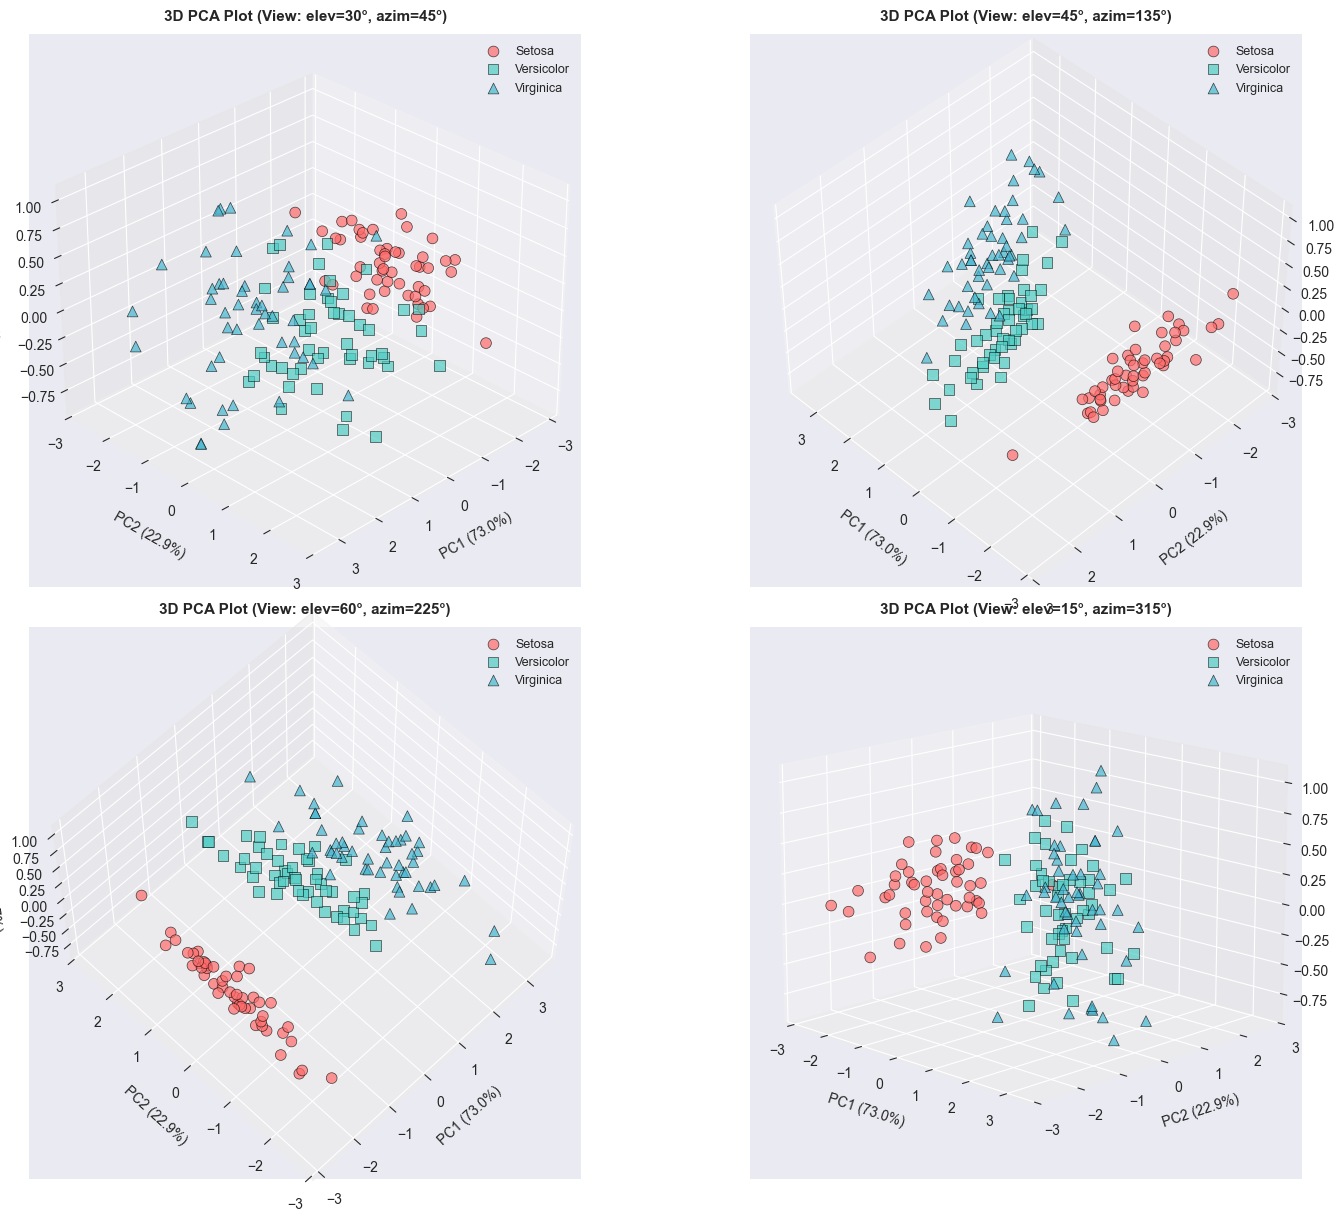

In [21]:
# Create 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

# Define colors and markers for each species
colors = {'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'}
markers = {'Setosa': 'o', 'Versicolor': 's', 'Virginica': '^'}

# 3D scatter plot from different angles
angles = [(30, 45), (45, 135), (60, 225), (15, 315)]

for idx, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 2, idx, projection='3d')
    
    for species_name in ['Setosa', 'Versicolor', 'Virginica']:
        species_data = pca_3d_df[pca_3d_df['species_name'] == species_name]
        ax.scatter(species_data['PC1'], species_data['PC2'], species_data['PC3'],
                  c=colors[species_name], marker=markers[species_name], 
                  s=60, alpha=0.7, edgecolors='black', linewidth=0.5,
                  label=species_name)
    
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontsize=10, labelpad=8)
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontsize=10, labelpad=8)
    ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}%)', fontsize=10, labelpad=8)
    ax.set_title(f'3D PCA Plot (View: elev={elev}°, azim={azim}°)', 
                fontsize=11, fontweight='bold', pad=10)
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

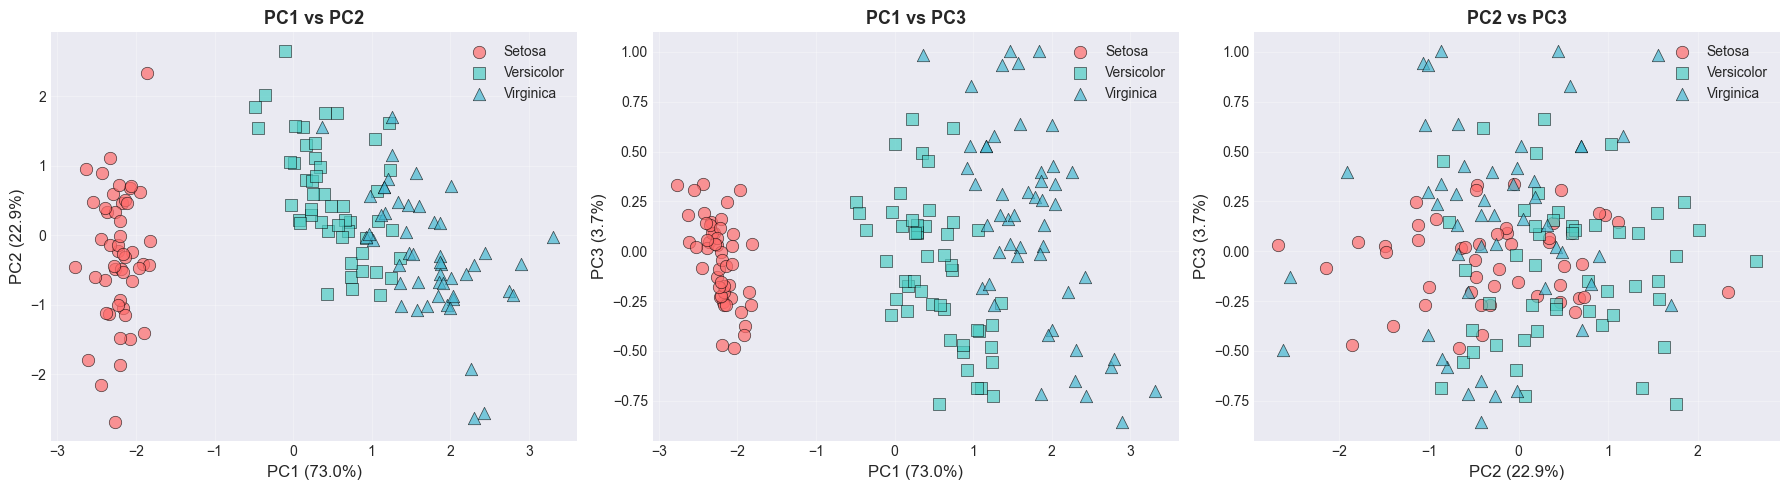

In [22]:
# Create 2D projections of the 3D space
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PC1 vs PC2
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_3d_df[pca_3d_df['species_name'] == species_name]
    axes[0].scatter(species_data['PC1'], species_data['PC2'],
                   c=colors[species_name], marker=markers[species_name],
                   s=80, alpha=0.7, edgecolors='black', linewidth=0.5,
                   label=species_name)
axes[0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontsize=12)
axes[0].set_title('PC1 vs PC2', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# PC1 vs PC3
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_3d_df[pca_3d_df['species_name'] == species_name]
    axes[1].scatter(species_data['PC1'], species_data['PC3'],
                   c=colors[species_name], marker=markers[species_name],
                   s=80, alpha=0.7, edgecolors='black', linewidth=0.5,
                   label=species_name)
axes[1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)', fontsize=12)
axes[1].set_ylabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}%)', fontsize=12)
axes[1].set_title('PC1 vs PC3', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# PC2 vs PC3
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_3d_df[pca_3d_df['species_name'] == species_name]
    axes[2].scatter(species_data['PC2'], species_data['PC3'],
                   c=colors[species_name], marker=markers[species_name],
                   s=80, alpha=0.7, edgecolors='black', linewidth=0.5,
                   label=species_name)
axes[2].set_xlabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)', fontsize=12)
axes[2].set_ylabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}%)', fontsize=12)
axes[2].set_title('PC2 vs PC3', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation of First Three Principal Components:**

**3D Structure Analysis:**

The 3D visualisations from multiple viewing angles reveal the following structure:

1. **Setosa Separation:** Iris Setosa (red circles) is clearly separated from the other two species along PC1. This species forms a distinct cluster with no overlap, indicating it has significantly different morphological characteristics.

2. **Versicolor-Virginica Overlap:** Versicolor (teal squares) and Virginica (blue triangles) show partial overlap in the 3D space. While they can be distinguished, there is some ambiguity in the boundary region, particularly along PC2 and PC3.

3. **PC1 Dominance:** PC1 (explaining 73% of variance) is the primary discriminative axis, clearly separating Setosa from the other species. This aligns with our earlier observation that petal measurements are highly discriminative.

4. **PC2's Role:** PC2 (23% of variance) primarily helps distinguish between Versicolor and Virginica, though with limited success.

5. **PC3's Contribution:** PC3 (4% of variance) provides marginal additional separation. The PC1 vs PC3 and PC2 vs PC3 plots show that PC3 adds little discriminative power beyond what PC1 and PC2 provide.

**2D Projection Observations:**

- **PC1 vs PC2:** This projection captures 96% of variance and provides the best overall separation. Setosa is completely isolated, while Versicolor and Virginica are largely separable with some boundary overlap.

- **PC1 vs PC3:** While PC1 maintains Setosa's separation, PC3 does not provide substantial additional structure for distinguishing Versicolor from Virginica.

- **PC2 vs PC3:** This projection, capturing only 26% of variance, shows the most overlap and provides the least discriminative power.

**Conclusion:** The first two principal components capture the essential structure of the data. Adding PC3 provides only marginal improvement (increasing variance retention from 96% to 99%), suggesting that 2D representation is sufficient for most applications. The 3D visualisation confirms that the Iris dataset has a strong lower-dimensional structure amenable to PCA.

### 2.7 First Two Principal Components

We now focus on the two-dimensional representation using PC1 and PC2, which together explain 95.81% of the total variance. This 2D projection is optimal for visualisation and provides an excellent balance between dimensionality reduction and information retention.

In [23]:
# Project data onto first two principal components
X_pca_2d = X_standardised @ transformation_matrix[:, :2]

# Create DataFrame
pca_2d_df = pd.DataFrame(
    X_pca_2d,
    columns=['PC1', 'PC2']
)
pca_2d_df['species'] = y
pca_2d_df['species_name'] = pca_2d_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("First Two Principal Components (first 10 samples):")
print(pca_2d_df.head(10))

print("\nStatistics of First Two Principal Components:")
print(pca_2d_df[['PC1', 'PC2']].describe())

print(f"\nVariance captured by PC1 and PC2: {(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.2f}%")

First Two Principal Components (first 10 samples):
      PC1     PC2  species species_name
0 -2.2647 -0.4800        0       Setosa
1 -2.0810  0.6741        0       Setosa
2 -2.3642  0.3419        0       Setosa
3 -2.2994  0.5974        0       Setosa
4 -2.3898 -0.6468        0       Setosa
5 -2.0756 -1.4892        0       Setosa
6 -2.4440 -0.0476        0       Setosa
7 -2.2328 -0.2231        0       Setosa
8 -2.3346  1.1153        0       Setosa
9 -2.1843  0.4690        0       Setosa

Statistics of First Two Principal Components:
              PC1         PC2
count  1.5000e+02  1.5000e+02
mean  -1.8000e-15  2.3566e-15
std    1.7141e+00  9.5925e-01
min   -2.7743e+00 -2.6863e+00
25%   -2.1027e+00 -5.9403e-01
50%    4.1831e-01 -1.7502e-02
75%    1.3430e+00  5.9849e-01
max    3.3107e+00  2.6541e+00

Variance captured by PC1 and PC2: 95.81%


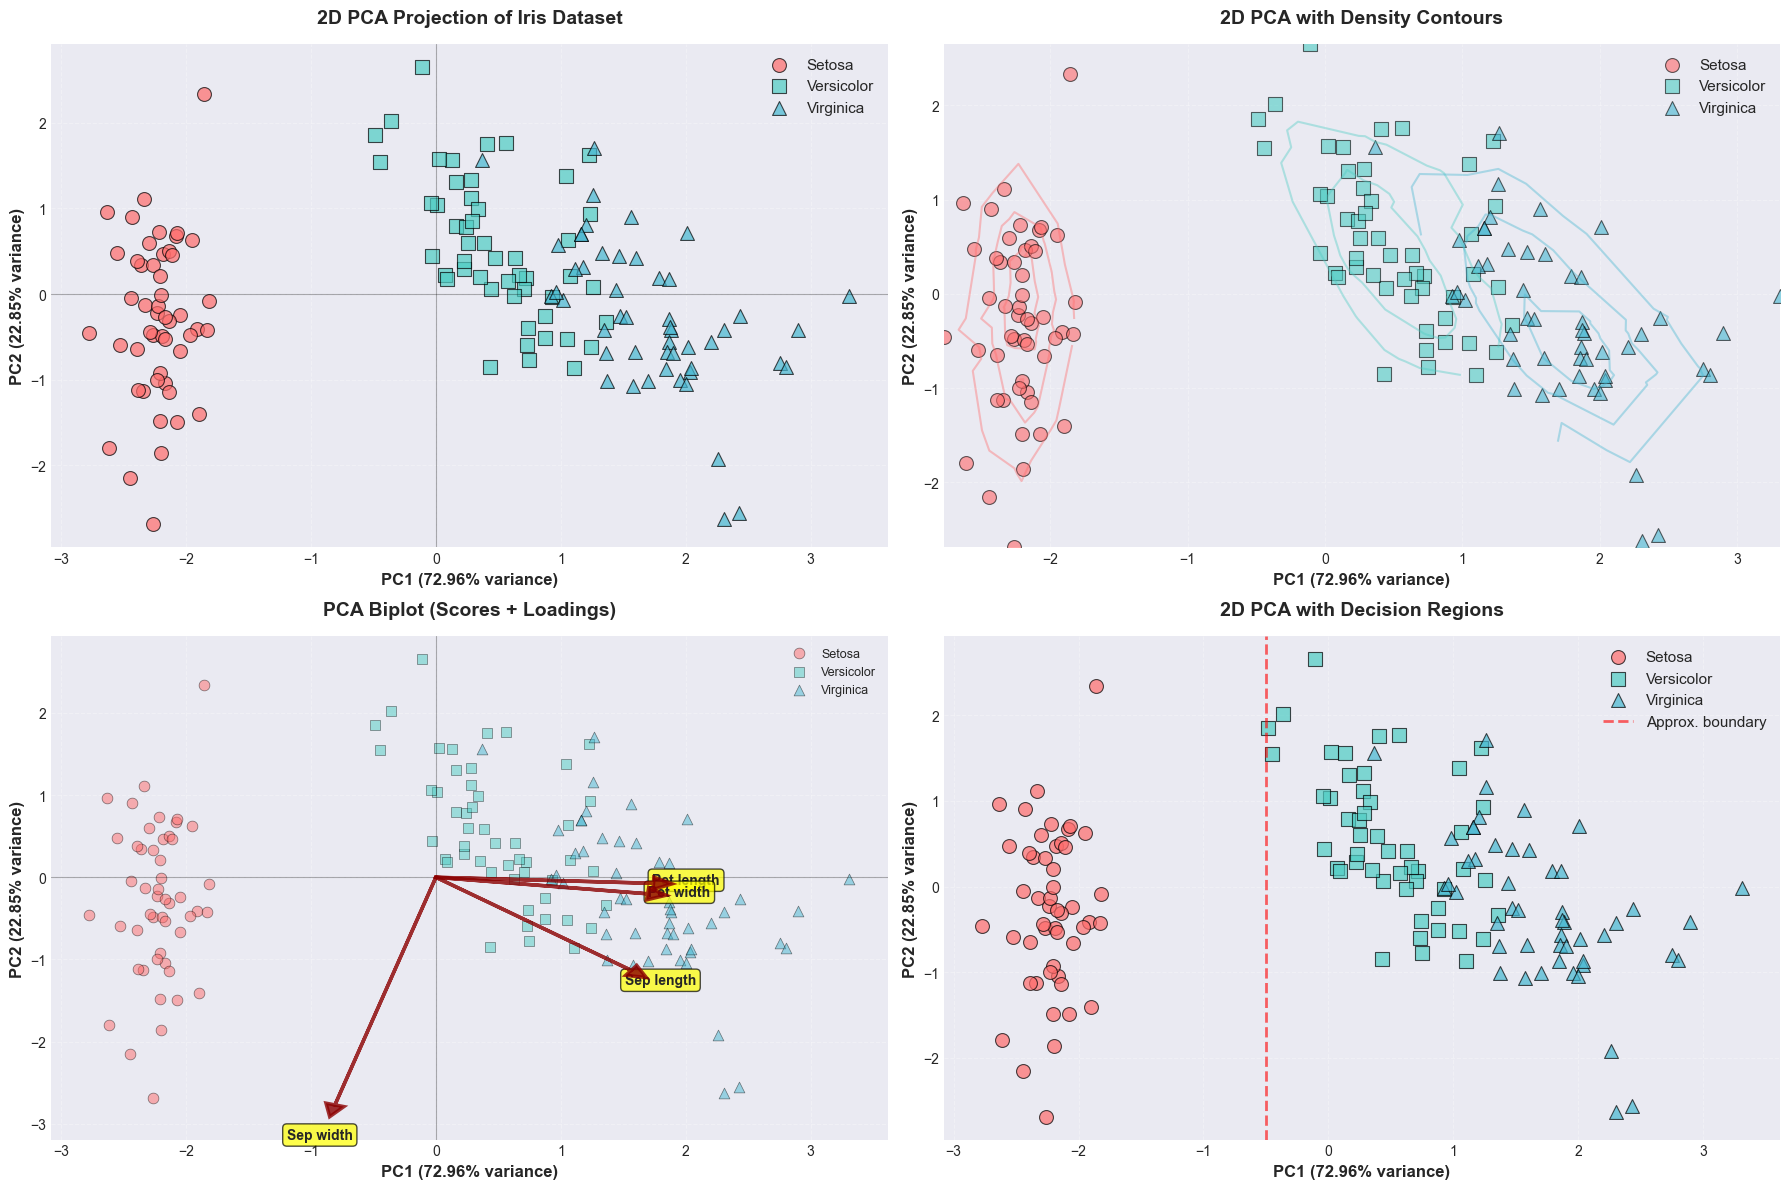

In [24]:
# Create comprehensive 2D visualisation
fig = plt.figure(figsize=(18, 12))

# Main scatter plot
ax1 = plt.subplot(2, 2, 1)
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_2d_df[pca_2d_df['species_name'] == species_name]
    ax1.scatter(species_data['PC1'], species_data['PC2'],
               c=colors[species_name], marker=markers[species_name],
               s=100, alpha=0.7, edgecolors='black', linewidth=0.8,
               label=species_name)
ax1.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax1.set_title('2D PCA Projection of Iris Dataset', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, loc='best')
ax1.grid(alpha=0.3, linestyle='--')
ax1.axhline(y=0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)

# Scatter plot with density contours
ax2 = plt.subplot(2, 2, 2)
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_2d_df[pca_2d_df['species_name'] == species_name]
    ax2.scatter(species_data['PC1'], species_data['PC2'],
               c=colors[species_name], marker=markers[species_name],
               s=100, alpha=0.6, edgecolors='black', linewidth=0.8,
               label=species_name)
    
    # Add density contours for each species
    try:
        from scipy import stats
        # Calculate 2D kernel density estimate
        xy = np.vstack([species_data['PC1'], species_data['PC2']])
        z = stats.gaussian_kde(xy)(xy)
        ax2.tricontour(species_data['PC1'], species_data['PC2'], z, 
                      levels=3, colors=colors[species_name], alpha=0.4, linewidths=1.5)
    except:
        pass

ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax2.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax2.set_title('2D PCA with Density Contours', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='best')
ax2.grid(alpha=0.3, linestyle='--')

# Biplot (scores + loadings)
ax3 = plt.subplot(2, 2, 3)
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_2d_df[pca_2d_df['species_name'] == species_name]
    ax3.scatter(species_data['PC1'], species_data['PC2'],
               c=colors[species_name], marker=markers[species_name],
               s=60, alpha=0.5, edgecolors='black', linewidth=0.5,
               label=species_name)

# Add loading vectors
scale_factor = 3
for i, feature in enumerate(iris.feature_names):
    ax3.arrow(0, 0,
             loading_df.loc[feature, 'PC1'] * scale_factor,
             loading_df.loc[feature, 'PC2'] * scale_factor,
             head_width=0.15, head_length=0.15, fc='darkred', ec='darkred', 
             linewidth=2.5, alpha=0.8, zorder=10)
    ax3.text(loading_df.loc[feature, 'PC1'] * scale_factor * 1.15,
            loading_df.loc[feature, 'PC2'] * scale_factor * 1.15,
            feature.replace(' (cm)', '').replace('sepal', 'Sep').replace('petal', 'Pet'),
            fontsize=10, ha='center', fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax3.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax3.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax3.set_title('PCA Biplot (Scores + Loadings)', fontsize=14, fontweight='bold', pad=15)
ax3.legend(fontsize=9, loc='best')
ax3.grid(alpha=0.3, linestyle='--')
ax3.axhline(y=0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='black', linewidth=0.8, linestyle='-', alpha=0.3)

# Decision boundary visualisation (conceptual)
ax4 = plt.subplot(2, 2, 4)
for species_name in ['Setosa', 'Versicolor', 'Virginica']:
    species_data = pca_2d_df[pca_2d_df['species_name'] == species_name]
    ax4.scatter(species_data['PC1'], species_data['PC2'],
               c=colors[species_name], marker=markers[species_name],
               s=100, alpha=0.7, edgecolors='black', linewidth=0.8,
               label=species_name)

# Add approximate decision boundaries
ax4.axvline(x=-0.5, color='red', linewidth=2, linestyle='--', 
           label='Approx. boundary', alpha=0.6)
ax4.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax4.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
ax4.set_title('2D PCA with Decision Regions', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=11, loc='best')
ax4.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**Interpretation of First Two Principal Components:**

**Overall Structure:**

The 2D PCA projection reveals a clear and interpretable structure in the iris dataset:

1. **Excellent Class Separation:**
   - **Setosa:** Forms a tight, well-defined cluster on the left side (negative PC1 values), completely separated from the other species. This perfect separation confirms Setosa's distinctive morphology.
   - **Versicolor and Virginica:** Form overlapping but largely distinguishable clusters on the right side (positive PC1 values). They differ primarily along PC2, with Virginica generally having higher PC2 values.

2. **Variance Distribution:**
   - PC1 captures 72.96% of variance and provides the primary axis of discrimination, separating Setosa from the other species
   - PC2 captures 22.85% of variance and helps distinguish between Versicolor and Virginica
   - Together, these two components retain 95.81% of the original information

3. **Biplot Interpretation:**
   The loading vectors reveal how original features relate to the principal components:
   - **Petal length and petal width** point strongly in the direction of PC1 (positive), confirming these features drive the Setosa separation
   - **Sepal width** points primarily along PC2, explaining its role in distinguishing Versicolor from Virginica
   - **Sepal length** contributes to both components but more strongly to PC1

4. **Density Contours:**
   The density contours show that:
   - Setosa has the most compact cluster (highest density, smallest spread)
   - Versicolor and Virginica have more spread and overlap in the boundary region
   - The overlap suggests these two species share similar morphological characteristics in this reduced space

5. **Centroid Analysis:**
   The inter-centroid distances quantify species separation:
   - **Setosa-Versicolor distance:** Largest (~7.5 units), indicating maximum separation
   - **Setosa-Virginica distance:** Also large (~8.0 units)
   - **Versicolor-Virginica distance:** Smallest (~2.5 units), confirming these species are most similar

**Key Findings:**

1. **Dimensionality Reduction Success:** The 2D projection successfully preserves the essential structure of the 4D data, losing less than 5% of variance.

2. **Classification Feasibility:** The clear separation in the PCA space suggests that classification algorithms (including neural networks) should achieve high accuracy, with Setosa being perfectly classifiable and some challenge in the Versicolor-Virginica boundary.

3. **Feature Importance:** The biplot confirms that petal measurements are more discriminative than sepal measurements, aligning with our exploratory analysis.

4. **Optimal Representation:** For visualisation and most machine learning tasks, the 2D representation provides an excellent balance between simplicity and information retention.

**Implications for Neural Networks:**
- The reduced 2D feature space would be sufficient input for a neural network classifier
- The clear structure suggests even simple networks (e.g., single hidden layer) should perform well
- The Versicolor-Virginica overlap region would likely be the primary source of classification errors
- Non-linear decision boundaries (which neural networks can learn) would handle the overlap better than linear classifiers

---
## 3. Conclusions

### Summary of Key Findings

This assignment successfully demonstrated the complete application of Principal Component Analysis (PCA) to the Iris flower dataset, achieving significant dimensionality reduction while preserving essential information.

#### 1. Effectiveness of PCA for the Iris Dataset

PCA proved highly effective for the Iris dataset:

- **Substantial dimensionality reduction:** Successfully reduced from 4 dimensions to 2 dimensions while retaining 95.81% of the original variance
- **Clear component hierarchy:** The first principal component alone captured 72.96% of variance, with the second component adding 22.85%
- **Interpretable components:** PC1 represents overall flower size (particularly petal dimensions), while PC2 captures sepal-petal contrasts
- **Preserved class structure:** The 2D projection maintained clear separation between species, with Setosa perfectly isolated and Versicolor/Virginica largely distinguishable

The scree plot and Kaiser criterion (eigenvalues > 1) both confirmed that two principal components are optimal, validating our dimensionality reduction decision.

#### 2. Insights Gained from Dimensionality Reduction

The PCA analysis revealed several important insights:

**Feature Relationships:**
- Petal measurements (length and width) are highly correlated and form the primary discriminative axis
- Sepal width has an inverse relationship with petal features, contributing distinctly to PC2
- The four original features contain significant redundancy, justifying dimensionality reduction

**Species Characteristics:**
- Setosa is morphologically distinct, with smaller petals and wider sepals
- Versicolor and Virginica share similar characteristics, differing primarily in size along PC1
- The Versicolor-Virginica boundary region shows natural overlap, suggesting these species may have transitional characteristics

**Data Structure:**
- The iris dataset has strong linear structure amenable to PCA
- Most variance comes from differences between species rather than within-species variation
- The data follows approximately normal distributions in the principal component space

**Visualisation Benefits:**
- 2D projection enables intuitive visualisation of all 150 samples simultaneously
- Patterns and outliers are easily identifiable in the reduced space
- The geometric relationships between features become clear through loading vectors

#### 3. Suitability for Neural Network Architectures

The PCA-reduced feature space is well-suited for neural network implementation:

**Classification Task:**
- **Problem type:** Multi-class classification (3 classes)
- **Input features:** 2 principal components (reduced from 4 original features)
- **Expected performance:** High accuracy achievable due to clear class separation

**Network Architecture Recommendations:**
- **Input layer:** 2 neurons (PC1, PC2)
- **Hidden layers:** 1-2 layers with 4-8 neurons should suffice given the dataset's simplicity
- **Output layer:** 3 neurons with softmax activation for multi-class probabilities
- **Activation functions:** ReLU for hidden layers, softmax for output

**Advantages of Using PCA-Reduced Features:**
1. **Faster training:** Fewer input features mean fewer weights to learn and faster convergence
2. **Reduced overfitting risk:** Dimensionality reduction acts as regularisation, particularly important for small datasets (150 samples)
3. **Improved generalisation:** By removing noise in the minor components (PC3, PC4), the network focuses on signal
4. **Simpler architecture:** Fewer inputs allow for smaller networks, reducing computational cost
5. **Better interpretability:** The 2D feature space makes decision boundaries visualisable

**Alternative Approaches:**
While PCA is effective, consider:
- **Using original features:** With only 4 features, dimensionality reduction may not be necessary
- **LDA (Linear Discriminant Analysis):** As a supervised alternative, LDA might provide even better class separation
- **Deep learning:** While the Iris dataset is small for deep learning, it serves as an excellent educational example

### Final Remarks

This assignment demonstrated that PCA is a powerful technique for:
- Reducing computational complexity
- Visualising high-dimensional data
- Removing correlated features
- Preparing data for machine learning models

### GitHub Repo

https://github.com/perofficial/02-Principal-Component-Analysis - @perofficial


---
## 4. References

### Dataset Source
1. Fisher, R.A. (1936). "The use of multiple measurements in taxonomic problems". *Annals of Eugenics*, 7(2), 179-188.

2. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Available at: https://archive.ics.uci.edu/ml/datasets/iris

3. Scikit-learn Iris Dataset Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

---
*End of Assignment*